In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

In [30]:
col = ['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile',
      'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve',
      'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve', 'Class']
df = pd.read_csv(r'C:\Users\user\Desktop\Μεταπτυχιακό\Εργασίες\Machine Learning\Μαγκλογιάννης\HTRU_2.csv', header=None)

In [31]:
df = pd.DataFrame(np.asarray(df), columns=col)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0


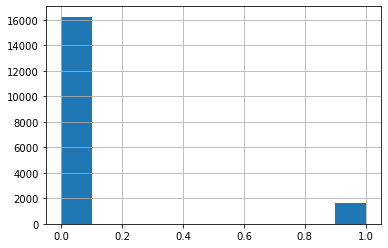

In [17]:
df['Class'].hist()
plt.show()

In [32]:
data = np.asarray(df)

In [33]:
nonPulsar = np.sum(data[:,8]==0)
Pulsar = np.sum(data[:,8]==1)
total = data.shape[0]

In [34]:
print(nonPulsar, Pulsar, total)

16259 1639 17898


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   Class                                         17898 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [28]:
df.duplicated().sum()

0

In [33]:
df.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
Class                                           0
dtype: int64

Παραπάνω βλέπουμε ότι δεν έχουμε missing values ή διπλοεγγραφές, οπότε δεν χρειάζεται να 'καθαρίσουμε' το σύνολο δεδομένων μας.

In [31]:
print('Non Pulsar :', round(nonPulsar * 100 / total, 4), '%\nPulsar :', round(Pulsar * 100 / total, 4), '%')

Non Pulsar : 90.8426 %
Pulsar : 9.1574 %


In [51]:
import seaborn as sns

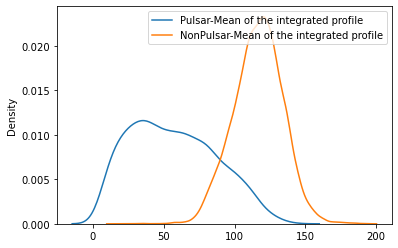

In [60]:
sns.kdeplot(data[data[:,8]==1,0], label='Pulsar-Mean of the integrated profile')
sns.kdeplot(data[data[:,8]==0,0], label='NonPulsar-Mean of the integrated profile')
plt.legend()
plt.show()

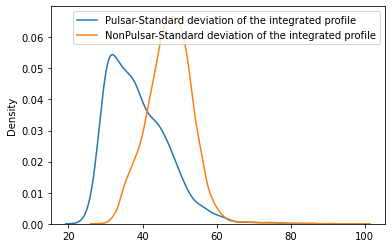

In [61]:
sns.kdeplot(data[data[:,8]==1,1], label='Pulsar-Standard deviation of the integrated profile')
sns.kdeplot(data[data[:,8]==0,1], label='NonPulsar-Standard deviation of the integrated profile')
plt.legend()
plt.show()

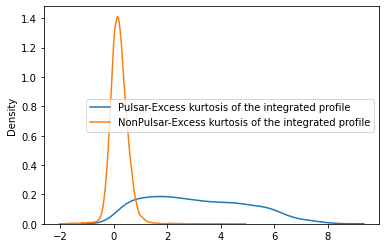

In [62]:
sns.kdeplot(data[data[:,8]==1,2], label='Pulsar-Excess kurtosis of the integrated profile')
sns.kdeplot(data[data[:,8]==0,2], label='NonPulsar-Excess kurtosis of the integrated profile')
plt.legend()
plt.show()

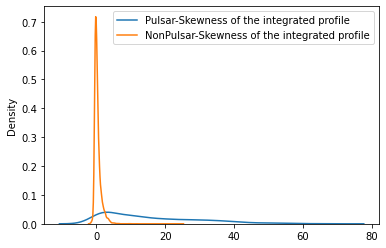

In [63]:
sns.kdeplot(data[data[:,8]==1,3], label='Pulsar-Skewness of the integrated profile')
sns.kdeplot(data[data[:,8]==0,3], label='NonPulsar-Skewness of the integrated profile')
plt.legend()
plt.show()

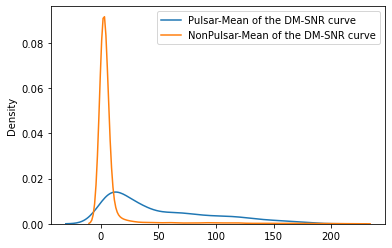

In [64]:
sns.kdeplot(data[data[:,8]==1,4], label='Pulsar-Mean of the DM-SNR curve')
sns.kdeplot(data[data[:,8]==0,4], label='NonPulsar-Mean of the DM-SNR curve')
plt.legend()
plt.show()

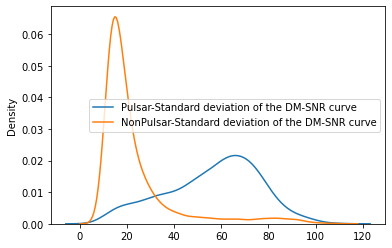

In [65]:
sns.kdeplot(data[data[:,8]==1,5], label='Pulsar-Standard deviation of the DM-SNR curve')
sns.kdeplot(data[data[:,8]==0,5], label='NonPulsar-Standard deviation of the DM-SNR curve')
plt.legend()
plt.show()

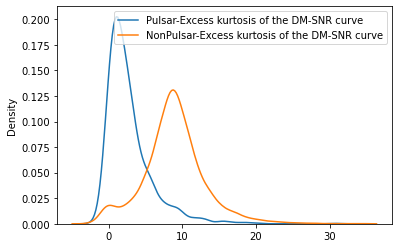

In [66]:
sns.kdeplot(data[data[:,8]==1,6], label='Pulsar-Excess kurtosis of the DM-SNR curve')
sns.kdeplot(data[data[:,8]==0,6], label='NonPulsar-Excess kurtosis of the DM-SNR curve')
plt.legend()
plt.show()

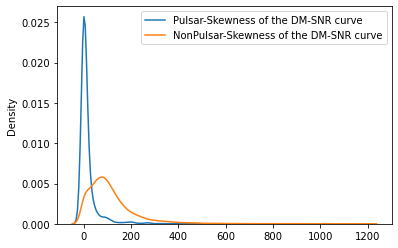

In [67]:
sns.kdeplot(data[data[:,8]==1,7], label='Pulsar-Skewness of the DM-SNR curve')
sns.kdeplot(data[data[:,8]==0,7], label='NonPulsar-Skewness of the DM-SNR curve')
plt.legend()
plt.show()

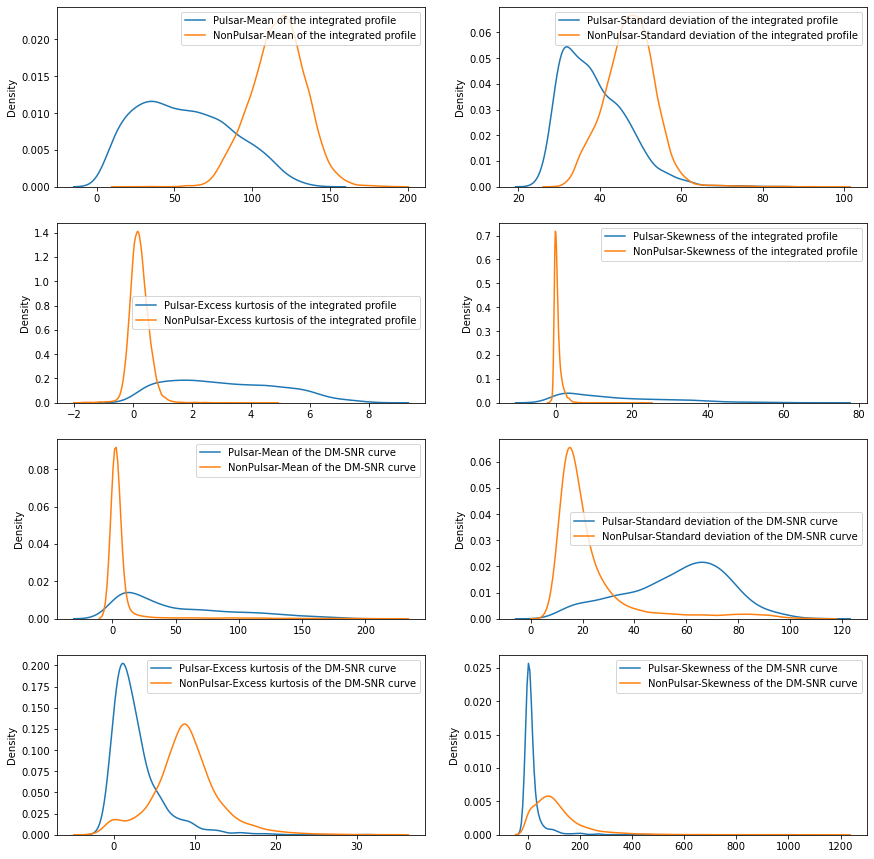

In [103]:
fig, axs = plt.subplots(4,2)
plt.subplots_adjust(wspace=.2, hspace=.2, top=3, right=2)
st = 0
for i in range(4):
    for j in range(2):
        sns.kdeplot(data[data[:,8]==1,st], label='Pulsar-' + col[st], ax=axs[i,j])
        sns.kdeplot(data[data[:,8]==0,st], label='NonPulsar-' + col[st], ax=axs[i,j])
        axs[i,j].legend()
        st += 1

plt.show()

In [38]:
X = data[:,:8]
y = data[:,8]

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score as cvs
from sklearn.svm import LinearSVC

In [40]:
Xtrans = StandardScaler().fit_transform(X)
Xtrans = MinMaxScaler(feature_range=(0,1)).fit_transform(Xtrans)

In [340]:
gs_l1_cv5 = []
gs_l2_cv5 = []
gs_l1_cv10 = []
gs_l2_cv10 = []

l1_est = LinearSVC(penalty='l1', loss='squared_hinge', max_iter=100000)
l2_est = LinearSVC(penalty='l2', loss='squared_hinge', max_iter=100000)
C = np.linspace(.5, 1.5, 10)

for c in C:
    l1_est = LinearSVC(C=c, penalty='l1', loss='squared_hinge', max_iter=100000, dual=False)
    l2_est = LinearSVC(C=c, penalty='l2', loss='squared_hinge', max_iter=100000)
    gs_l1_cv5.append( np.mean(cvs(l1_est, Xtrans, y, cv=5)))
    gs_l2_cv5.append( np.mean(cvs(l2_est, Xtrans, y, cv=5)))
    gs_l1_cv10.append( np.mean(cvs(l1_est, Xtrans, y, cv=10)))
    gs_l2_cv10.append( np.mean(cvs(l2_est, Xtrans, y, cv=10)))

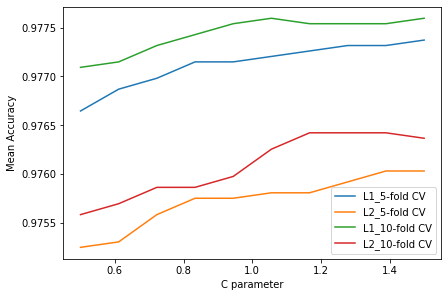

In [348]:
plt.plot(C, gs_l1_cv5, label='L1_5-fold CV')
plt.plot(C, gs_l2_cv5, label='L2_5-fold CV')
plt.plot(C, gs_l1_cv10, label='L1_10-fold CV')
plt.plot(C, gs_l2_cv10, label='L2_10-fold CV')
plt.legend()
plt.xlabel('C parameter')
plt.ylabel('Mean Accuracy')
plt.subplots_adjust(top=1, right=1)
plt.show()

In [344]:
gs_l1_cv5

[0.9766454223192085,
 0.9768689016157255,
 0.9769806646780334,
 0.9771483092714952,
 0.977148293662129,
 0.9772041751932831,
 0.9772600411150707,
 0.9773159070368583,
 0.9773159070368583,
 0.9773717729586462]

In [345]:
gs_l2_cv5

[0.9752486025714869,
 0.9753044684932748,
 0.9755838293209458,
 0.9757514583050414,
 0.9757514583050414,
 0.9758073398361953,
 0.9758073398361953,
 0.975919087289137,
 0.9760308347420785,
 0.9760308347420785]

In [346]:
gs_l1_cv10

[0.9770923489605939,
 0.9771482461098394,
 0.9773158751026603,
 0.9774276069462356,
 0.9775393700172689,
 0.9775952359390565,
 0.9775393700172689,
 0.9775393700172689,
 0.9775393700172689,
 0.9775952359390565]

In [347]:
gs_l2_cv10

[0.9755837817075799,
 0.975695544778613,
 0.9758631425439761,
 0.9758631425439761,
 0.9759748743875516,
 0.9762542039964901,
 0.976421832989311,
 0.976421832989311,
 0.976421832989311,
 0.9763659670675231]

In [40]:
l1_est = LinearSVC(C=1.15, penalty='l1', loss='squared_hinge', max_iter=100000, dual=False)

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrans, y, test_size=.25, random_state=43, shuffle=True)

In [41]:
l1_est.fit(Xtrain, ytrain)

LinearSVC(C=1.15, dual=False, max_iter=100000, penalty='l1')

In [22]:
print('Train Accuracy', l1_est.score(Xtrain, ytrain), '\nTest Accuracy', l1_est.score(Xtest, ytest))

Train Accuracy 0.9786187886463533 
Test Accuracy 0.9754189944134078


In [35]:
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1

In [24]:
print('Precision:', precision(ytest, l1_est.predict(Xtest)), '\nF1-Score:', f1(ytest, l1_est.predict(Xtest)), '\nRecall:', recall(ytest, l1_est.predict(Xtest)))

Precision: 0.947075208913649 
F1-Score: 0.8607594936708862 
Recall: 0.7888631090487239


In [49]:
from sklearn.metrics import roc_auc_score as roc_auc
from sklearn.metrics import matthews_corrcoef as mcc

In [44]:
print('MCC:', mcc(ytest, l1_est.predict(Xtest)), '\nROC AUC:', roc_auc(ytest, l1_est.predict(Xtest)))

MCC: 0.851660763551469 
ROC AUC: 0.8920823952760929


In [52]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


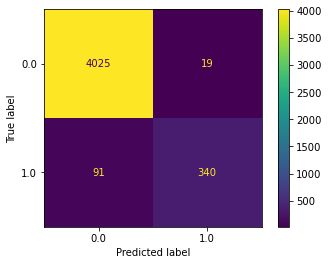

In [26]:
plot_confusion_matrix(l1_est, Xtest, ytest)

In [34]:
C = np.linspace(.1, 3.1, 30)
test_acc = []
train_acc = []
f1_l1 = []
pre_l1 = []
rec_l1 = []
for c in C:
    l1_est = LinearSVC(C=c, penalty='l1', loss='squared_hinge', max_iter=10000, dual=False).fit(Xtrain, ytrain)
    train_acc.append(l1_est.score(Xtrain, ytrain))
    test_acc.append(l1_est.score(Xtest, ytest))
    f1_l1.append(f1(ytest, l1_est.predict(Xtest)))
    pre_l1.append(precision(ytest, l1_est.predict(Xtest)))
    rec_l1.append(recall(ytest, l1_est.predict(Xtest)))

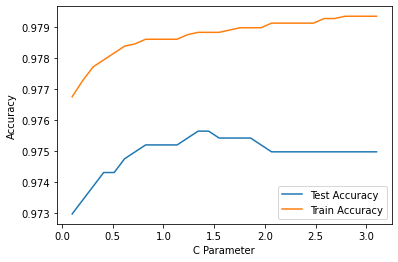

In [36]:
plt.plot(C, test_acc, label='Test Accuracy')
plt.plot(C, train_acc, label='Train Accuracy')
plt.legend()
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.show()

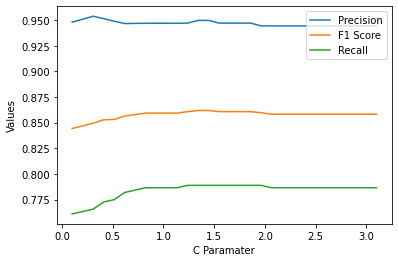

In [39]:
plt.plot(C, pre_l1, label='Precision')
plt.plot(C, f1_l1, label='F1 Score')
plt.plot(C, rec_l1, label='Recall')
plt.legend()
plt.xlabel('C Paramater')
plt.ylabel('Values')
plt.show()

In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

In [42]:
Xres, yres = SMOTE().fit_resample(Xtrain, ytrain)

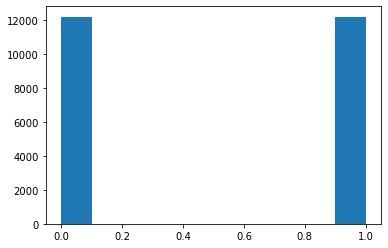

In [43]:
plt.hist(yres)
plt.show()

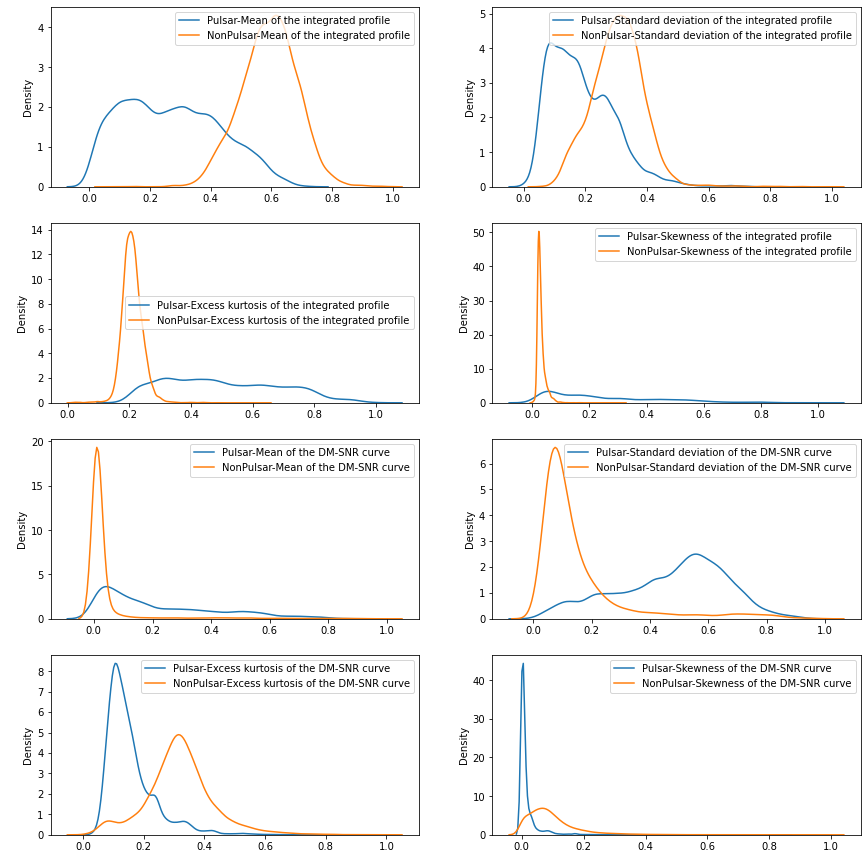

In [44]:
fig, axs = plt.subplots(4,2)
plt.subplots_adjust(wspace=.2, hspace=.2, top=3, right=2)
st = 0
for i in range(4):
    for j in range(2):
        sns.kdeplot(Xres[yres==1,st], label='Pulsar-' + col[st], ax=axs[i,j])
        sns.kdeplot(Xres[yres==0,st], label='NonPulsar-' + col[st], ax=axs[i,j])
        axs[i,j].legend()
        st += 1

plt.show()

In [45]:
l1_est = LinearSVC(C=1.15, penalty='l1', loss='squared_hinge', max_iter=100000, dual=False)
l1_est.fit(Xres, yres)

LinearSVC(C=1.15, dual=False, max_iter=100000, penalty='l1')

In [46]:
print('Train Accuracy', l1_est.score(Xres, yres), '\nTest Accuracy', l1_est.score(Xtest, ytest))

Train Accuracy 0.9496930004093328 
Test Accuracy 0.966927374301676


In [47]:
print('Precision:', precision(ytest, l1_est.predict(Xtest)), '\nF1-Score:', f1(ytest, l1_est.predict(Xtest)), '\nRecall:', recall(ytest, l1_est.predict(Xtest)))

Precision: 0.8004246284501062 
F1-Score: 0.835920177383592 
Recall: 0.8747099767981439


In [50]:
print('MCC:', mcc(ytest, l1_est.predict(Xtest)), '\nROC AUC:', roc_auc(ytest, l1_est.predict(Xtest)))

MCC: 0.8185662983353004 
ROC AUC: 0.9257328321181618


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


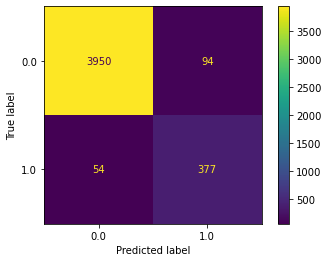

In [53]:
plot_confusion_matrix(l1_est, Xtest, ytest)

In [57]:
C = np.linspace(.1, 1.1, 10)
test_acc = []
train_acc = []
f1_l1 = []
pre_l1 = []
rec_l1 = []
for c in C:
    l1_est = LinearSVC(C=c, penalty='l1', loss='squared_hinge', max_iter=10000, dual=False).fit(Xres, yres)
    train_acc.append(l1_est.score(Xres, yres))
    test_acc.append(l1_est.score(Xtest, ytest))
    f1_l1.append(f1(ytest, l1_est.predict(Xtest)))
    pre_l1.append(precision(ytest, l1_est.predict(Xtest)))
    rec_l1.append(recall(ytest, l1_est.predict(Xtest)))

KeyboardInterrupt: 

In [ ]:
plt.plot(C, test_acc, label='Test Accuracy')
plt.plot(C, train_acc, label='Train Accuracy')
plt.legend()
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
plt.plot(C, pre_l1, label='Precision')
plt.plot(C, f1_l1, label='F1 Score')
plt.plot(C, rec_l1, label='Recall')
plt.legend()
plt.xlabel('C Paramater')
plt.ylabel('Values')
plt.show()

In [58]:
Xbres, ybres = BorderlineSMOTE().fit_resample(Xtrain, ytrain)

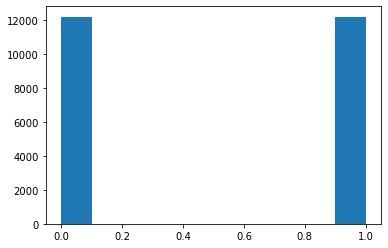

In [59]:
plt.hist(ybres)
plt.show()

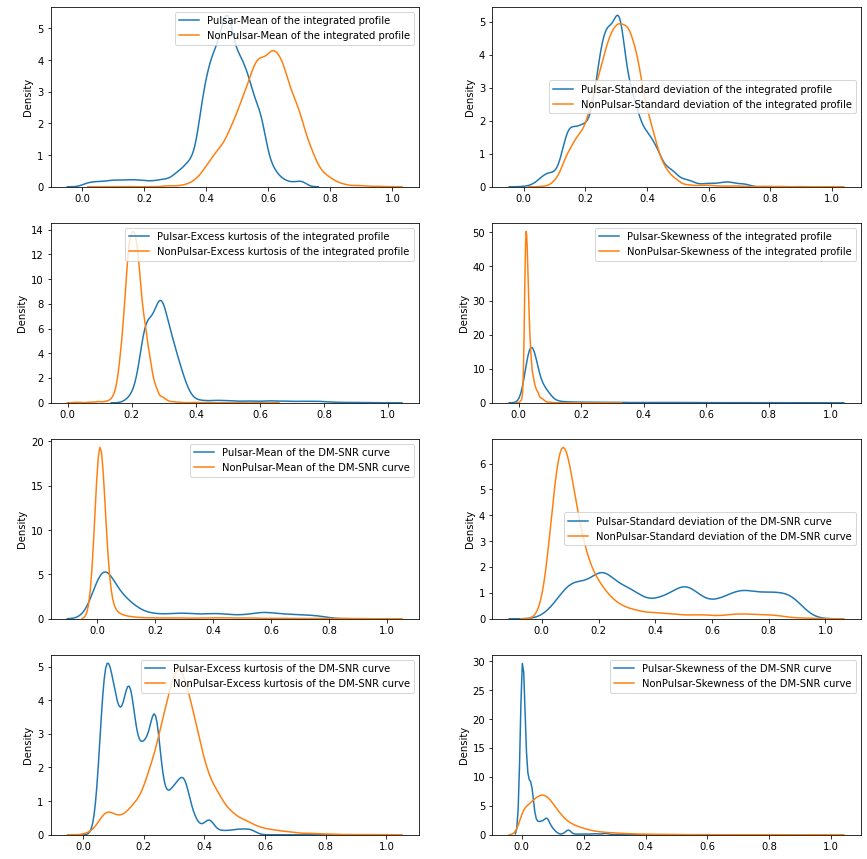

In [60]:
fig, axs = plt.subplots(4,2)
plt.subplots_adjust(wspace=.2, hspace=.2, top=3, right=2)
st = 0
for i in range(4):
    for j in range(2):
        sns.kdeplot(Xbres[ybres==1,st], label='Pulsar-' + col[st], ax=axs[i,j])
        sns.kdeplot(Xbres[ybres==0,st], label='NonPulsar-' + col[st], ax=axs[i,j])
        axs[i,j].legend()
        st += 1

plt.show()

In [61]:
l1_est = LinearSVC(C=1.15, penalty='l1', loss='squared_hinge', max_iter=100000, dual=False)
l1_est.fit(Xbres, ybres)

LinearSVC(C=1.15, dual=False, max_iter=100000, penalty='l1')

In [62]:
print('Train Accuracy', l1_est.score(Xbres, ybres), '\nTest Accuracy', l1_est.score(Xtest, ytest))

Train Accuracy 0.9300450266066312 
Test Accuracy 0.9360893854748603


In [63]:
print('Precision:', precision(ytest, l1_est.predict(Xtest)), '\nF1-Score:', f1(ytest, l1_est.predict(Xtest)), '\nRecall:', recall(ytest, l1_est.predict(Xtest)))

Precision: 0.6127527216174183 
F1-Score: 0.7337057728119182 
Recall: 0.91415313225058


In [64]:
print('MCC:', mcc(ytest, l1_est.predict(Xtest)), '\nROC AUC:', roc_auc(ytest, l1_est.predict(Xtest)))

MCC: 0.7170696354804198 
ROC AUC: 0.9262902159769221


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


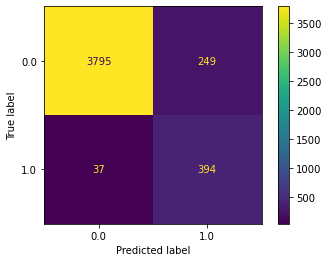

In [65]:
plot_confusion_matrix(l1_est, Xtest, ytest)

In [71]:
C = np.linspace(.1, 1.1, 10)
test_acc = []
train_acc = []
f1_l1 = []
pre_l1 = []
rec_l1 = []
for c in C:
    l1_est = LinearSVC(C=c, penalty='l1', loss='squared_hinge', max_iter=10000, dual=False).fit(Xbres, ybres)
    train_acc.append(l1_est.score(Xbres, ybres))
    test_acc.append(l1_est.score(Xtest, ytest))
    f1_l1.append(f1(ytest, l1_est.predict(Xtest)))
    pre_l1.append(precision(ytest, l1_est.predict(Xtest)))
    rec_l1.append(recall(ytest, l1_est.predict(Xtest)))

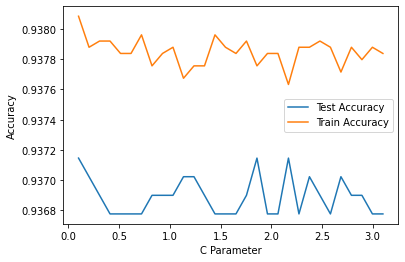

In [72]:
plt.plot(C, test_acc, label='Test Accuracy')
plt.plot(C, train_acc, label='Train Accuracy')
plt.legend()
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.show()

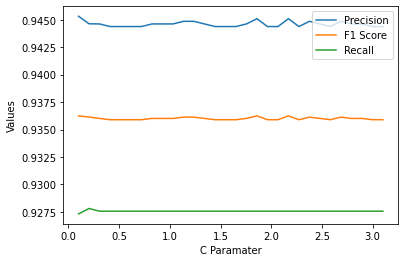

In [73]:
plt.plot(C, pre_l1, label='Precision')
plt.plot(C, f1_l1, label='F1 Score')
plt.plot(C, rec_l1, label='Recall')
plt.legend()
plt.xlabel('C Paramater')
plt.ylabel('Values')
plt.show()